In [2]:
import numpy as np
import random as rm
import timeit as tt
import statistics as st
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt
import pandas as pd
import sympy as smp

**1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

Total No. of Multiplications = n.m.k\
Total No. of Additions = n.m.(k-1)\
The resultant matrix will have every element as the dot product of the row and column vector of length k. For each of these the number of multipcations is k and number of additions is (k-1). Therefore the total is this count times n.m. 

**2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [3]:
n = 10
m = 8
k = 12

# initializing matrices a and b
a = []
for i in range(n):
  column = []
  for j in range(k):
    column.append(rm.randint(1,9))
  a.append(column)

b = []
for i in range(k):
  column = []
  for j in range(m):
    column.append(rm.randint(1,9))
  b.append(column)

# matrix to store the result 
c = []
for i in range(n):
  column = []
  for j in range(m):
    column.append(0)
  c.append(column)

time1 = []
time2 = []

# a) List method
def f1(a,b,c):
  for i in range (len(a)):
    for j in range (len(b[0])):
      for p in range (len(a[0])):
        c[i][j] += a[i][p]*b[p][j]
  return c

# b) Numpy method
def f2(a,b):
  return np.dot(a,b)

print("a = ", a)
print("b =", b)
print("result1 = ", f1(a,b,c))
print("result2 = ", f2(a,b))

for count in range(1000):
  
  for i in range(n):
    for j in range(m):
      c[i][j] = 0

  t0 = tt.default_timer()
  res1 = f1(a,b,c)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time1.append(time)


  t0 = tt.default_timer() 
  result2 = f2(a,b)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time2.append(time)

# average times
ti1 = sum(time1)/len(time1)
ti2 = sum(time2)/len(time2)
ti1 = round(ti1,3)
ti2 = round(ti2,3)

# sd's
sd1 = st.pstdev(time1)
sd2 = st.pstdev(time2)
sd1 = round(sd1,3)
sd2 = round(sd2,3)

print("Using list method: ", ti1,"+/-", sd1, " micro seconds")
print("Using numpy method: ", ti2,"+/-", sd2, " micro seconds")


a =  [[8, 1, 5, 9, 6, 1, 8, 8, 6, 9, 4, 6], [9, 3, 8, 4, 2, 3, 9, 2, 6, 5, 8, 3], [5, 3, 1, 2, 4, 9, 5, 1, 5, 4, 5, 7], [5, 8, 2, 7, 2, 5, 8, 7, 8, 8, 1, 8], [1, 3, 4, 5, 3, 4, 7, 3, 4, 7, 7, 8], [7, 2, 6, 8, 2, 7, 8, 4, 7, 1, 7, 4], [6, 7, 1, 9, 2, 5, 7, 7, 1, 7, 1, 9], [5, 9, 3, 8, 1, 7, 7, 2, 1, 5, 2, 8], [4, 3, 5, 5, 4, 6, 9, 1, 1, 5, 1, 5], [2, 8, 8, 9, 3, 6, 8, 4, 6, 9, 8, 1]]
b = [[7, 5, 6, 4, 8, 9, 7, 3], [4, 5, 5, 8, 5, 6, 7, 7], [4, 7, 2, 1, 5, 4, 3, 3], [2, 4, 2, 1, 5, 2, 1, 7], [1, 3, 9, 1, 6, 8, 4, 4], [1, 1, 3, 1, 6, 5, 4, 1], [2, 2, 7, 9, 5, 4, 5, 9], [6, 5, 8, 3, 6, 9, 8, 8], [8, 6, 1, 4, 8, 7, 2, 3], [1, 2, 4, 5, 1, 3, 5, 6], [8, 1, 6, 3, 5, 7, 9, 9], [1, 5, 6, 1, 6, 7, 4, 2]]
result1 =  [[264, 279, 360, 244, 382, 412, 336, 390], [270, 238, 291, 240, 345, 358, 314, 334], [175, 169, 250, 170, 290, 308, 249, 229], [242, 274, 327, 276, 374, 394, 325, 364], [187, 195, 273, 196, 285, 306, 270, 307], [263, 239, 284, 209, 370, 363, 295, 326], [187, 234, 318, 232, 326, 348, 30

Therefore, we can come to the conclusion that using numpy is faster as it can do the multiple calculations at the same time or in a parallel manner. Also most of the numpy library is written in C or C++ which makes it faster.

**3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

Taking the size of the array to be n.
Then the time complexity of finding the median of the array will be O(n^(⌈n/2⌉)).\
Another easier method would be to sort the array in O(n log n) time and then finding the middle element in O(1) time.

In [6]:
num_list = []
num_elements = 501

for i in range(num_elements):
    num_list.append(rm.randint(1, 101))

copy_list = num_list.copy()
iterations = num_elements // 2

def custom_median(num):
    for r in range(iterations):
        maximum = num[0]
        for t in range(1, len(num)):
            if num[t] > maximum:
                maximum = num[t]
        num.remove(maximum)
    
    maximum = num[0]
    for t in range(1, len(num)):
        if num[t] > maximum:
            maximum = num[t]
    return maximum

def sort_method():
    num_list.sort()
    return num_list[iterations]

def numpy_method():
    return np.median(num_list)
  
print(custom_median(copy_list))
print(sort_method())
print(int(numpy_method()))

time_custom = []
time_sort = []
time_numpy = []

for count in range(1000):
    copy_list = num_list.copy()

    t0 = tt.default_timer()
    result_custom = custom_median(copy_list)
    t1 = tt.default_timer()
    time = (t1 - t0) * 1000000
    time_custom.append(time)

    t0 = tt.default_timer() 
    result_sort = sort_method()
    t1 = tt.default_timer()
    time = (t1 - t0) * 1000000
    time_sort.append(time)

    t0 = tt.default_timer() 
    result_numpy = numpy_method()
    t1 = tt.default_timer()
    time = (t1 - t0) * 1000000
    time_numpy.append(time)

time_avg_custom = sum(time_custom) / len(time_custom)
time_avg_sort = sum(time_sort) / len(time_sort)
time_avg_numpy = sum(time_numpy) / len(time_numpy)

time_avg_custom = round(time_avg_custom, 3)
time_avg_sort = round(time_avg_sort, 3)
time_avg_numpy = round(time_avg_numpy, 3)

std_dev_custom = st.pstdev(time_custom)
std_dev_sort = st.pstdev(time_sort)
std_dev_numpy = st.pstdev(time_numpy)

std_dev_custom = round(std_dev_custom, 3)
std_dev_sort = round(std_dev_sort, 3)
std_dev_numpy = round(std_dev_numpy, 3)

print("Custom median method: ", time_avg_custom, "+/-", std_dev_custom, " micro sec")
print("Sort method: ", time_avg_sort, "+/-", std_dev_sort, " micro sec")
print("Numpy method: ", time_avg_numpy, "+/-", std_dev_numpy, " micro sec")

49
49
49
Custom median method:  4233.447 +/- 219.127  micro sec
Sort method:  4.282 +/- 5.321  micro sec
Numpy method:  118.031 +/- 63.502  micro sec


The time complexities follows the below order.\
Sort() > Numpy method > n//2 pass method.


**4. What is the gradient of the following function with respect to x and y?\
$x^2y + y^3\sin(x)$**



Ans.\
wrt $x$, the gradient is $2xy + y^3\cos(x)$\
wrt $y$, the gradient is $x^2 + 3y^2\sin(x)$

**5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [4]:
def f(x, y):
  return x**2*y + y**3*jnp.sin(x)

# manual derivatives
def fx(x, y):
  return 2*x*y + y**3*jnp.cos(x)
def fy(x, y):
  return x**2 + 3*y**2*jnp.sin(x)


df_dx = grad(f, argnums=0)
df_dy = grad(f, argnums=1)
for i in range(5):
  x = round(rm.uniform(0.0,10.0),2)
  y = round(rm.uniform(0.0,10.0),2)
  print(x,y)
  print("wrt x- JAX: ",float(df_dx(x, y))," manual: ",float(fx(x,y)))
  print("wrt y- JAX: ",float(df_dy(x, y))," manual: ",float(fy(x,y)))

3.41 9.35
wrt x- JAX:  -724.3659057617188  manual:  -724.365966796875
wrt y- JAX:  -57.924259185791016  manual:  -57.924251556396484
4.77 8.78
wrt x- JAX:  122.73284912109375  manual:  122.73284912109375
wrt y- JAX:  -208.12860107421875  manual:  -208.1286163330078
8.68 6.83
wrt x- JAX:  -115.68704223632812  manual:  -115.68704223632812
wrt y- JAX:  170.19943237304688  manual:  170.19943237304688
4.11 0.25
wrt x- JAX:  2.0461466312408447  manual:  2.0461466312408447
wrt y- JAX:  16.73760223388672  manual:  16.73760223388672
8.38 8.15
wrt x- JAX:  -135.21127319335938  manual:  -135.21127319335938
wrt y- JAX:  242.55352783203125  manual:  242.55352783203125


**6. Use sympy to confirm that you obtain the same gradient analytically.**

In [7]:
x, y = smp.symbols('x y', real = True)
fx = x**2*y + y**3*smp.sin(x)

dfbydx = smp.diff(fx, x)
dfbydy = smp.diff(fx, y)
print(dfbydx)
print(dfbydy)

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


**8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [25]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = []
        self.marks=marks

class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

**9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

**Case1: $y$ $=$ $x$**

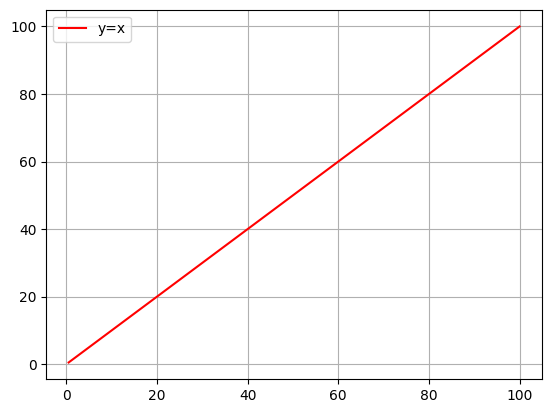

In [9]:
x = np.linspace(0.5,100,200)
y1 = x
plt.plot(x, y1, '-r', label='y=x')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**Case 2: $y$ $=$ $x^2$**

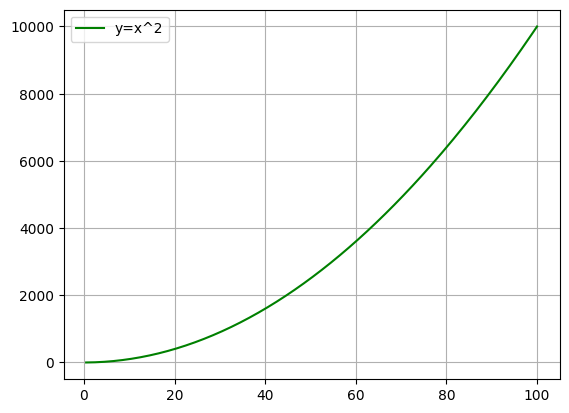

In [10]:
y2 = x*x
plt.plot(x, y2, '-g', label='y=x^2')

plt.legend(loc='upper left')
plt.grid()
plt.show()

**Case 3: $y$ $=$ $x^3/100$**

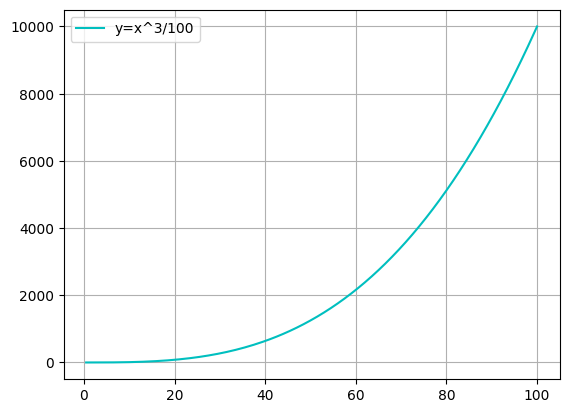

In [11]:
y3 = (x**3)/100
plt.plot(x, y3, '-c', label='y=x^3/100')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**Case 4:$y$ $=$ $sin(x)$**

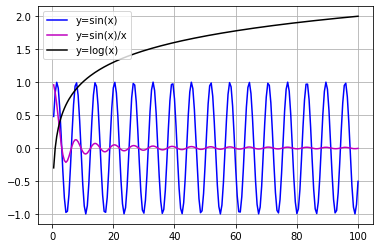

In [ ]:
y4 = np.sin(x)
y5 = np.sin(x)/x
y6 = np.log10(x)
plt.plot(x, y4, '-b', label='y=sin(x)')
plt.plot(x, y5, '-m', label='y=sin(x)/x')
plt.plot(x, y6, '-k', label='y=log(x)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**Case 5: $y$ $=$ $sin(x)/x$**

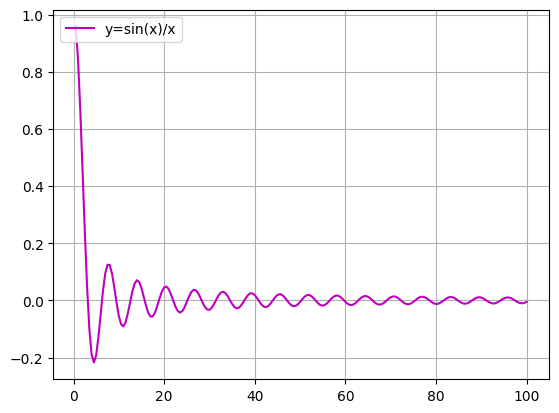

In [15]:

y5 = np.sin(x)/x
plt.plot(x, y5, '-m', label='y=sin(x)/x')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**Case 6: $y$ $=$ $log(x)$**

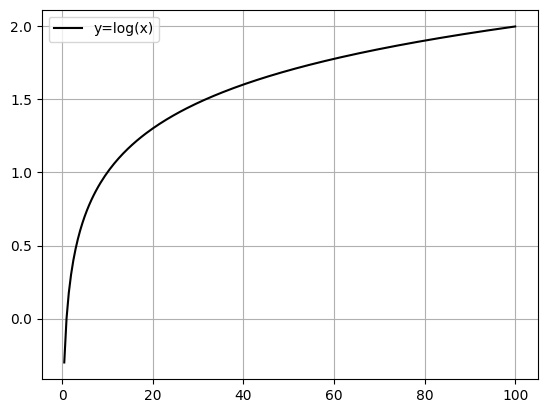

In [13]:
y6 = np.log10(x)

plt.plot(x, y6, '-k', label='y=log(x)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**Case 7:$y$ $=$ $e^x$**

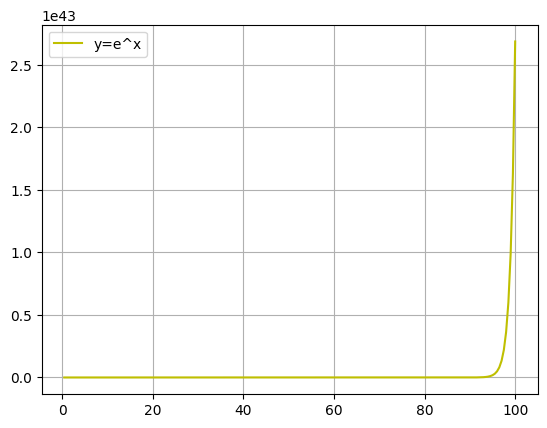

In [16]:
y7 = np.exp(x)
plt.plot(x, y7, '-y', label='y=e^x')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [19]:


# Generate a matrix of size 20x5 with random numbers between 1 and 2
np.random.seed(42)  # Setting seed for reproducibility
data = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame with the generated matrix and name the columns
df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])
print(df)
# Find the column with the highest standard deviation
highest_std_column = df.std().idxmax()
print("Column with the highest standard deviation:", highest_std_column)

# Find the row with the lowest mean
lowest_mean_row = df.mean(axis=1).idxmin()
print("Row with the lowest mean:", lowest_mean_row)


           a         b         c         d         e
0   1.374540  1.950714  1.731994  1.598658  1.156019
1   1.155995  1.058084  1.866176  1.601115  1.708073
2   1.020584  1.969910  1.832443  1.212339  1.181825
3   1.183405  1.304242  1.524756  1.431945  1.291229
4   1.611853  1.139494  1.292145  1.366362  1.456070
5   1.785176  1.199674  1.514234  1.592415  1.046450
6   1.607545  1.170524  1.065052  1.948886  1.965632
7   1.808397  1.304614  1.097672  1.684233  1.440152
8   1.122038  1.495177  1.034389  1.909320  1.258780
9   1.662522  1.311711  1.520068  1.546710  1.184854
10  1.969585  1.775133  1.939499  1.894827  1.597900
11  1.921874  1.088493  1.195983  1.045227  1.325330
12  1.388677  1.271349  1.828738  1.356753  1.280935
13  1.542696  1.140924  1.802197  1.074551  1.986887
14  1.772245  1.198716  1.005522  1.815461  1.706857
15  1.729007  1.771270  1.074045  1.358466  1.115869
16  1.863103  1.623298  1.330898  1.063558  1.310982
17  1.325183  1.729606  1.637557  1.887213  1.

**11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [21]:
# Add a new column 'f' which is the sum of columns 'a', 'b', 'c', 'd', 'e'
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Create a new column 'g' based on conditions of column 'f'
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find the number of rows where the value in column 'g' is 'LT8'
num_LT8_rows = df[df['g'] == 'LT8'].shape[0]

# Find the standard deviation of column 'f' for rows where 'g' is 'LT8' and 'GT8'
std_LT8 = df[df['g'] == 'LT8']['f'].std()
std_GT8 = df[df['g'] == 'GT8']['f'].std()

print("Number of rows where 'g' is 'LT8':", num_LT8_rows)
print("Standard deviation of 'f' where 'g' is 'LT8':", std_LT8)
print("Standard deviation of 'f' where 'g' is 'GT8':", std_GT8)


Number of rows where 'g' is 'LT8': 18
Standard deviation of 'f' where 'g' is 'LT8': 0.4025886500663061
Standard deviation of 'f' where 'g' is 'GT8': 0.7956146881961926


**12. Write a small piece of code to explain broadcasting in numpy.**

In [22]:
a = np.array([[30.0,25.0,20.0],
             [19.0,17.0,15.0]])
b = np.array([1.0,2.0,3.0])

print(a+b)

[[31. 27. 23.]
 [20. 19. 18.]]


a.shape is (2,3) and b.shape is (1,3). Element-wise addition was performed between the two arrays resulting in the expected output without explicitly replicating b

**13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [24]:
def custom_argmin(arr):
    min_val = arr[0]
    min_index = 0
    
    for i in range(1, len(arr)):
        if arr[i] < min_val:
            min_val = arr[i]
            min_index = i
    
    return min_index

# Example usage:
sz = 10
array = 10 * np.random.rand(sz)
array = np.array(array)

result_custom = custom_argmin(array)
result_np = np.argmin(array)

print("Array:", array)
print("Index of minimum element (custom function):", result_custom)
print("Index of minimum element (np.argmin):", result_np)


Array: [2.89751453 1.61221287 9.29697652 8.0812038  6.33403757 8.7146059
 8.03672077 1.86570059 8.92558998 5.39342242]
Index of minimum element (custom function): 1
Index of minimum element (np.argmin): 1
